In [1]:
import numpy as np
import pandas as pd 
import pickle
import matplotlib.pyplot as plt

In [2]:
# Keep the outliers
def keepOnlyOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
 
    #print("IQR value for column %s is: %s" % (col, IQR))
 
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    #print(f"lower_range: {lower_range}")
    #print(f"upper_range: {upper_range}")
    outlier_list = [x for x in data[col] if (
        (x < lower_range) | (x > upper_range))]
    return data.loc[data[col].isin(outlier_list)] 

## VIX options

In [3]:
dir_path = 'results_train_14w'

In [4]:
with open(f'{dir_path}/n_beats_interval_14w_VIX_2007-2009.pkl', 'rb') as f:
    vix_nbeats_mapes = pickle.load(f)

In [5]:
with open(f'{dir_path}/ETS_interval_14w_VIX_2007-2009.pkl', 'rb') as f:
    vix_ETS_mapes = pickle.load(f)

In [6]:
with open(f'{dir_path}/prophet_interval_14w_VIX_2007-2009.pkl', 'rb') as f:
    vix_prophet_mapes = pickle.load(f)

In [7]:
with open(f'{dir_path}/arima_interval_14w_VIX_2007-2009.pkl', 'rb') as f:
    vix_arima_mapes = pickle.load(f)

In [8]:
def createDataFrame(list_of_tuples, column_name):
    "create dataframes from list of mapes, dates tuples, pick end date"
    df = pd.DataFrame(list(map(lambda x: (x[0], x[1][1]), list_of_tuples)),\
                      columns=[column_name, 'Date'])
    df.set_index('Date', inplace=True)
    return df 

In [9]:
vix_arima_df = createDataFrame(vix_arima_mapes, 'arima_mape')
vix_ETS_df = createDataFrame(vix_ETS_mapes, 'ETS_mape')
vix_prophet_df = createDataFrame(vix_prophet_mapes, 'prophet_mape')
vix_nbeats_df = createDataFrame(vix_nbeats_mapes, 'nbeats_mape').multiply(100) 

In [10]:
vix_arima_df.head(3)

arima_mape
Date                  
2007-02-26   78.900630
2007-03-05   70.726658
2007-03-12  324.898222

In [11]:
vix_ETS_df.head(3)

ETS_mape
Date                  
2007-02-26  105.661288
2007-03-05   93.732171
2007-03-12  158.679980

In [12]:
df = pd.concat([vix_arima_df, vix_ETS_df, vix_prophet_df, vix_nbeats_df],\
               axis=1)
df['wmape'] = (df['arima_mape'] + df['ETS_mape'] + df['prophet_mape'] + df['nbeats_mape'])/4
df.head(3)

arima_mape    ETS_mape  prophet_mape  nbeats_mape       wmape
Date                                                                     
2007-02-26   78.900630  105.661288    107.480690  1334.084072  406.531670
2007-03-05   70.726658   93.732171     76.467058   766.156491  251.770595
2007-03-12  324.898222  158.679980    286.729335    51.420124  205.431915

In [13]:
vix_prophet_df.head(3)

prophet_mape
Date                    
2007-02-26    107.480690
2007-03-05     76.467058
2007-03-12    286.729335

In [14]:
vix_nbeats_df.head(3)

nbeats_mape
Date                   
2007-02-26  1334.084072
2007-03-05   766.156491
2007-03-12    51.420124

We are taking 12 weeks moving windows for finding if last week is outlier. 

In [15]:
upper_limit = df.shape[0] - 12 
arima_anomaly = []
for i in range(upper_limit):
    dfw = df[i:i+12]
    outlier = keepOnlyOutliers(dfw, 'arima_mape')
    if dfw[-1:].index.to_pydatetime()[0] in outlier.index.to_pydatetime():
        anomaly = outlier[-1:].index.to_pydatetime()[0] 
        arima_anomaly.append(anomaly)
        print(anomaly)


2007-10-08 00:00:00
2008-03-31 00:00:00
2008-07-28 00:00:00
2008-09-01 00:00:00
2008-10-27 00:00:00
2008-12-29 00:00:00
2009-04-06 00:00:00
2009-05-25 00:00:00
2009-09-21 00:00:00
2009-09-28 00:00:00
2009-10-05 00:00:00
2009-11-23 00:00:00
2009-12-28 00:00:00


In [16]:
upper_limit = df.shape[0] - 12 
ETS_anomaly = []
for i in range(upper_limit):
    dfw = df[i:i+12]
    outlier = keepOnlyOutliers(dfw, 'ETS_mape')
    if dfw[-1:].index.to_pydatetime()[0] in outlier.index.to_pydatetime():
        anomaly = outlier[-1:].index.to_pydatetime()[0] 
        ETS_anomaly.append(anomaly)
        print(anomaly)


2007-09-03 00:00:00
2007-10-08 00:00:00
2007-12-24 00:00:00
2007-12-31 00:00:00
2008-03-31 00:00:00
2008-07-28 00:00:00
2008-09-01 00:00:00
2008-10-27 00:00:00
2008-12-29 00:00:00
2009-04-06 00:00:00
2009-05-04 00:00:00
2009-05-25 00:00:00
2009-09-21 00:00:00
2009-09-28 00:00:00
2009-12-28 00:00:00


In [17]:
upper_limit = df.shape[0] - 12 
prophet_anomaly = []
for i in range(upper_limit):
    dfw = df[i:i+12]
    outlier = keepOnlyOutliers(dfw, 'prophet_mape')
    if dfw[-1:].index.to_pydatetime()[0] in outlier.index.to_pydatetime():
        anomaly = outlier[-1:].index.to_pydatetime()[0] 
        prophet_anomaly.append(anomaly)
        print(anomaly)

2007-09-03 00:00:00
2007-10-08 00:00:00
2007-12-10 00:00:00
2008-03-31 00:00:00
2008-09-01 00:00:00
2008-10-27 00:00:00
2008-12-29 00:00:00
2009-04-06 00:00:00
2009-05-25 00:00:00
2009-08-31 00:00:00
2009-09-21 00:00:00
2009-09-28 00:00:00
2009-11-23 00:00:00
2009-12-28 00:00:00


In [18]:
upper_limit = df.shape[0] - 12 
nbeats_anomaly = []
for i in range(upper_limit):
    dfw = df[i:i+12]
    outlier = keepOnlyOutliers(dfw, 'nbeats_mape')
    if dfw[-1:].index.to_pydatetime()[0] in outlier.index.to_pydatetime():
        anomaly = outlier[-1:].index.to_pydatetime()[0] 
        nbeats_anomaly.append(anomaly)
        print(anomaly)

2007-07-16 00:00:00
2008-07-14 00:00:00
2008-08-18 00:00:00
2008-10-13 00:00:00
2009-02-16 00:00:00
2009-03-02 00:00:00
2009-03-30 00:00:00
2009-05-11 00:00:00
2009-07-20 00:00:00
2009-08-17 00:00:00
2009-09-14 00:00:00
2009-11-09 00:00:00


In [19]:
upper_limit = df.shape[0] - 12 
wmape_anomaly = []
for i in range(upper_limit):
    dfw = df[i:i+12]
    outlier = keepOnlyOutliers(dfw, 'wmape')
    if dfw[-1:].index.to_pydatetime()[0] in outlier.index.to_pydatetime():
        anomaly = outlier[-1:].index.to_pydatetime()[0] 
        wmape_anomaly.append(anomaly)
        print(anomaly)

2007-10-08 00:00:00
2008-03-31 00:00:00
2008-07-28 00:00:00
2008-09-01 00:00:00
2008-10-27 00:00:00
2008-12-29 00:00:00
2009-04-06 00:00:00
2009-05-11 00:00:00
2009-05-25 00:00:00
2009-09-14 00:00:00
2009-09-21 00:00:00
2009-09-28 00:00:00
2009-12-28 00:00:00


In [20]:
df.tail(3)

arima_mape    ETS_mape  prophet_mape  nbeats_mape       wmape
Date                                                                     
2010-02-01  286.675886  154.061537     98.765760    52.998144  148.125332
2010-02-08  113.839127   68.160088     55.602454    63.239775   75.210361
2010-02-15   56.343069   66.754939     50.035075    44.561561   54.423661

In [21]:
with open('VIX_options.pkl', 'rb') as f:
    vix_opt = pickle.load(f)

<AxesSubplot:xlabel='Date'>

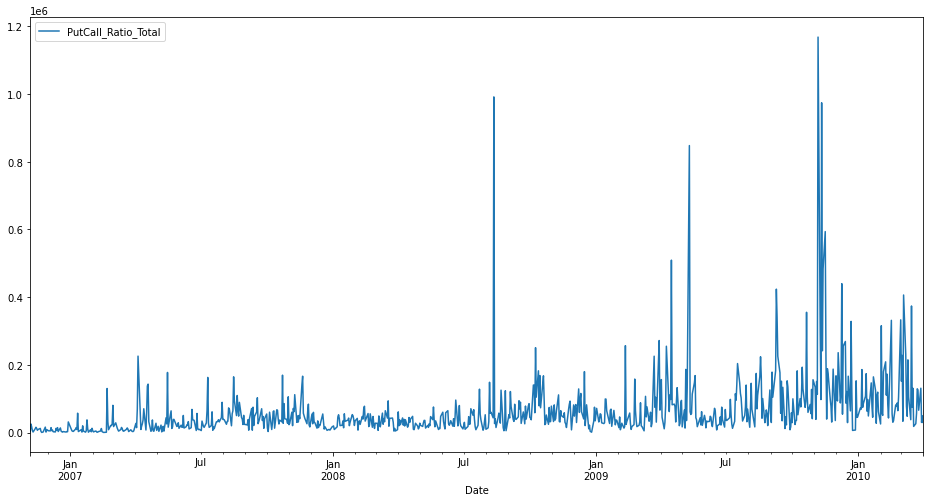

In [22]:
vix_opt[:'2010-04-01'].plot(figsize=(16,8))

In [23]:
vix_opt1 = vix_opt[:'2010-04-01']

In [24]:
def outlier_detection(option_df, anomalies):
    """
    Add column 'anomaly' to dataframe to mark outliers as True, non-outliers as False. 
    """
    # identify outliers
    option_df = option_df.assign(anomaly = False)
    for idx in anomalies:
        option_df.loc[idx, 'anomaly'] = True
    
    return option_df

In [25]:
arima_detection = outlier_detection(vix_opt1, arima_anomaly)
ETS_detection = outlier_detection(vix_opt1, ETS_anomaly)
prophet_detection = outlier_detection(vix_opt1, prophet_anomaly)
nbeats_detection = outlier_detection(vix_opt1, nbeats_anomaly)
average_detection = outlier_detection(vix_opt1, wmape_anomaly)

In [26]:
def visualize_outliers(anomaly_detection, model_name):
    anomaly_detection.reset_index(inplace=True)
    # visualization of outliers detected
    fig, ax = plt.subplots(figsize=(15,5))
    a = anomaly_detection[anomaly_detection['anomaly'] == True]  # anomaly
    ax.plot(anomaly_detection.Date, anomaly_detection['PutCall_Ratio_Total'], color='black', label = 'Normal')
    ax.scatter(a.Date, a['PutCall_Ratio_Total'], color='red', label = 'Anomaly')
    plt.title(f'Structural Break Detection with {model_name}')
    plt.legend()
    plt.show()


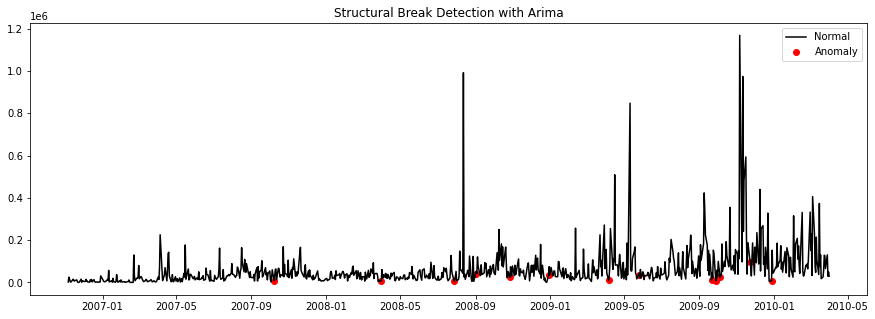

In [27]:
visualize_outliers(arima_detection, 'Arima') 

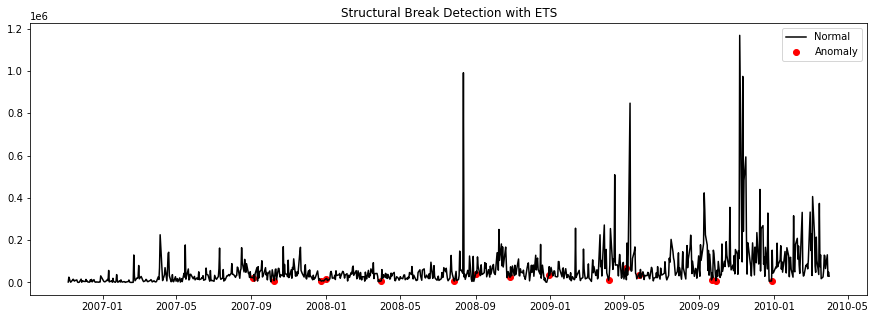

In [28]:
visualize_outliers(ETS_detection, 'ETS') 

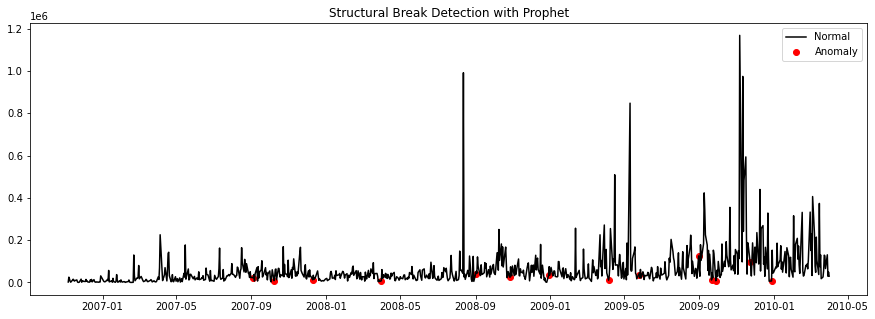

In [29]:
visualize_outliers(prophet_detection, 'Prophet') 

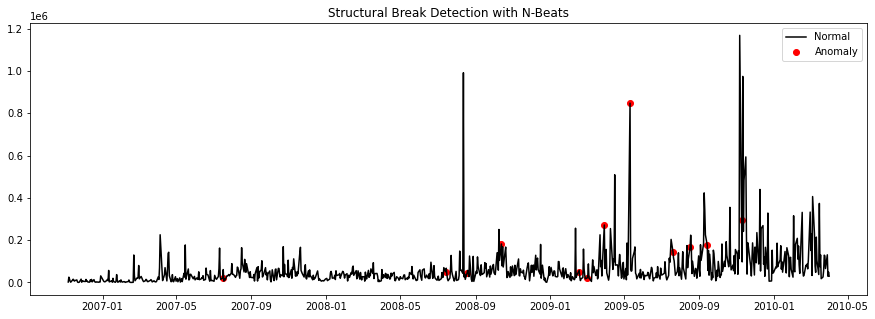

In [30]:
visualize_outliers(nbeats_detection, 'N-Beats') 

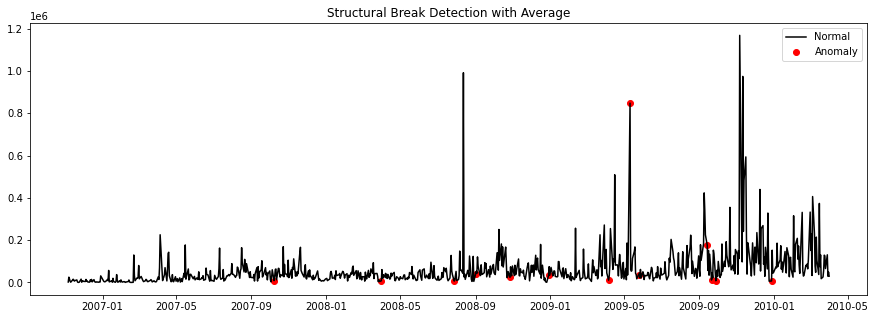

In [31]:
visualize_outliers(average_detection, 'Average') 